In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
from practical import *
import time

# Jarzynski's equality
$ e^{-\Delta F / k_B T} = \langle e^{-W / k_B T} \rangle $

$ \Delta F = -kT \ln <e^{-\beta W}> $,
where $\Delta F$ is the free energy difference between the two
states, $k$ is the Boltzmann constant, $T$ is the temperature,
$W$ is the work done in the nonequilibrium process, and the
brackets denote the average over multiple nonequilibrium processes.

In [2]:
pulling_speed = 0.01
# run the simulation
tic = time.perf_counter()
run_at(pulling_speed)
toc = time.perf_counter()
print(f"Ran in {toc - tic:0.4f} seconds")

Nsteps 1000000.0
velocity_per_step 2e-05
Ran in 184.4657 seconds


namd.sh: line 4: vmd: command not found


## Load the data

In [3]:
# your simulation
timestep, distance, force = np.genfromtxt(f"velocity_{pulling_speed}/da_smd_tcl.out").T
# 10 repeat simulations using a slower pulling speed 
longtime_data = np.genfromtxt(f"da.dat").T
timestep_long = longtime_data[0]
distances_long = longtime_data[range(1,11)]
forces_long = longtime_data[range(11,21)]
# even slower pulling speed experiments
exact_data = np.genfromtxt("Fexact.dat")

In [4]:
dt = 0.1 * pulling_speed
print(dt)
pulling_displacement = distance[0]+timestep*pulling_speed

0.001


## Graph the end-to-end distance versus time

Text(0.5, 0, 'Time [ps]')

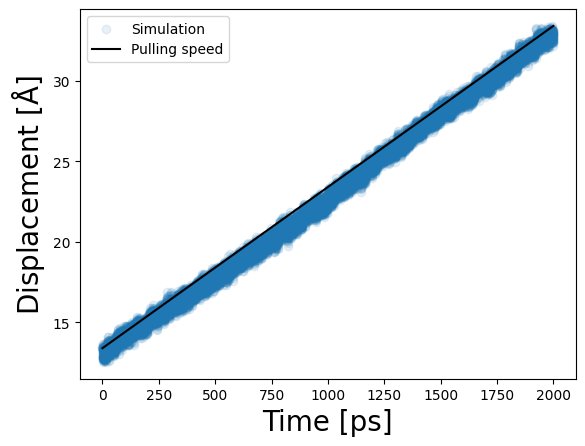

In [5]:
plt.scatter(timestep, distance, alpha=0.1, label="Simulation")
plt.plot(timestep, pulling_displacement, label="Pulling speed", color="k")
plt.legend()
plt.ylabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.xlabel("Time [ps]", fontsize=FONTSIZE)

## Graph Force versus end-to-end distance

Text(0, 0.5, 'Force [$\\mathrm{\\AA}$/ps]')

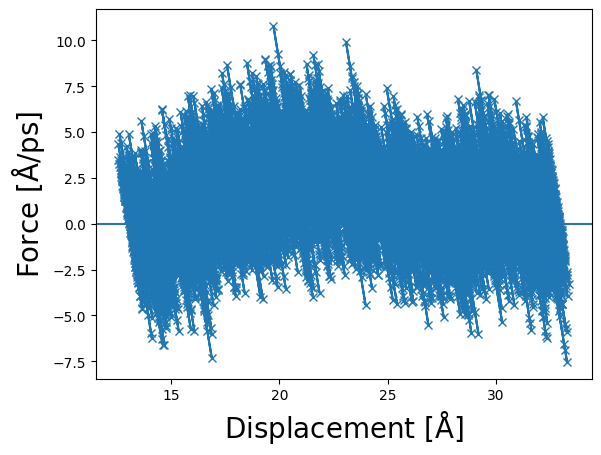

In [6]:
plt.plot(distance, force, "-x")
plt.axhline(0)
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("Force [$\mathrm{\AA}$/ps]", fontsize=FONTSIZE)

## Graph the number of hydrogen bonds versus time

Text(0, 0.5, 'Number of H-bonds')

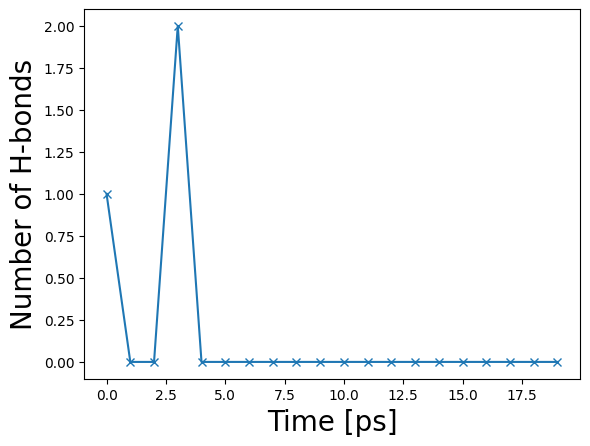

In [7]:
# load the H bonds data
time_hbonds, n_hbonds = np.genfromtxt("Hbonds.dat").T
# plot H bonds as a function of time
plt.plot(time_hbonds, n_hbonds, "-x")
plt.xlabel("Time [ps]", fontsize=FONTSIZE)
plt.ylabel("Number of H-bonds", fontsize=FONTSIZE)

Text(0, 0.5, '$\\Delta$F [kcal/mol]')

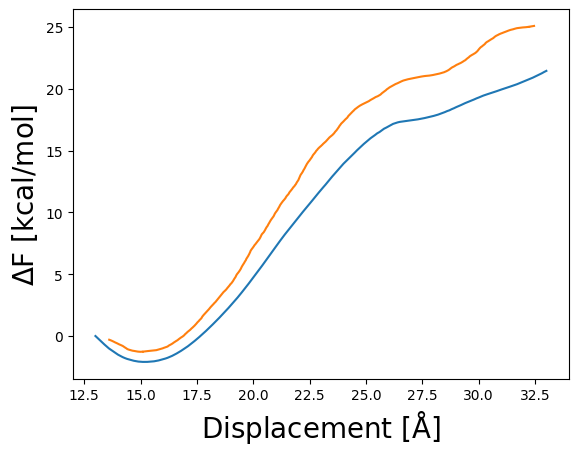

In [20]:
dG_short = jarzynski(force, dt=dt)
Navg=1000
plt.plot(*exact_data.T)
plt.plot(running_mean(distance, N=Navg), running_mean(dG_short, N=Navg))
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("$\Delta$F [kcal/mol]", fontsize=FONTSIZE)

# Analyse 10 trajectories from a slower pulling speed

Text(0.5, 0, 'Time [ps]')

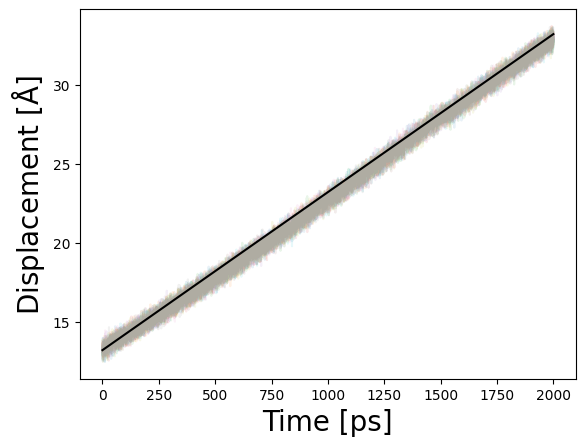

In [9]:
pulling_velocity_slower = 0.01
for i in range(10):
    plt.plot(timestep_long, distances_long[i], alpha=0.1)
plt.plot(timestep_long, distances_long[0][0]+timestep_long*pulling_velocity_slower, label="Pulling speed", color="k")
plt.ylabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.xlabel("Time [ps]", fontsize=FONTSIZE)

Text(0, 0.5, 'Force [$\\mathrm{\\AA}$/ps]')

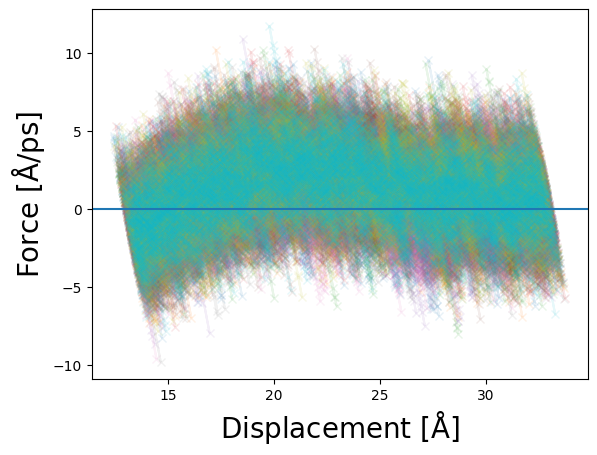

In [10]:
for i in range(10):
    plt.plot(distances_long[i], forces_long[i], "-x", alpha=0.1)
plt.axhline(0)
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("Force [$\mathrm{\AA}$/ps]", fontsize=FONTSIZE)

Text(0, 0.5, '$\\Delta$F [kcal/mol]')

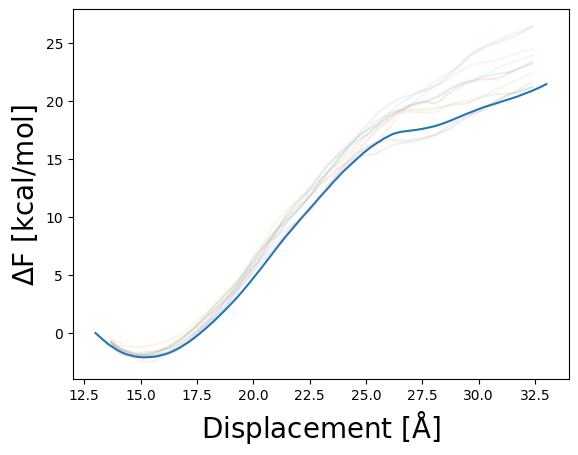

In [13]:
plt.plot(*exact_data.T)

for i in range(10):
    dG = jarzynski(forces_long[i], velocity=pulling_velocity_slower, dt=0.1)
    plt.plot(running_mean(distances_long[i]), running_mean(dG), 
                                                           alpha=0.1)
    
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("$\Delta$F [kcal/mol]", fontsize=FONTSIZE)

## Compare the Free Energy landscapes as a function of pulling speed

Text(0, 0.5, '$\\Delta$F [kcal/mol]')

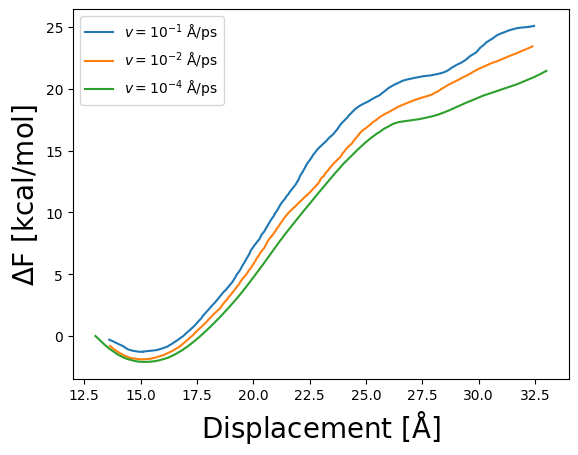

In [15]:
mean_forces = forces_long.mean(axis=0)

Navg
plt.plot(running_mean(distance, N=Navg), running_mean(dG_short, N=Navg), 
         label="$v = 10^{-1}~\mathrm{\AA}/$ps")

plt.plot(running_mean(distances_long[0]), 
         running_mean(jarzynski(mean_forces, velocity=pulling_velocity_slower, dt=0.1)),
         label="$v = 10^{-2}~\mathrm{\AA}/$ps")
        
    
plt.plot(*exact_data.T, label="$v = 10^{-4}~\mathrm{\AA}/$ps")

plt.legend()
plt.xlabel("Displacement [$\mathrm{\AA}$]", fontsize=FONTSIZE)
plt.ylabel("$\Delta$F [kcal/mol]", fontsize=FONTSIZE)